In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
!pip install wget 
import wget

In [2]:
#importing data
wget.filename_from_url('https://github.com/LambdaSchool/DS-Unit-2-Applied-Modeling/blob/master/data/caterpillar/caterpillar-tube-pricing.zip')

'caterpillar-tube-pricing.zip'

In [3]:
ls *.zip

 Volume in drive C has no label.
 Volume Serial Number is FAF5-51B9

 Directory of C:\Users\tako\Desktop\Lambda SChool Class\DS-Unit-2-Applied-Modeling-master\module1-log-linear-regression

08/06/2019  11:14 PM           823,789 caterpillar-tube-pricing.zip
05/12/2018  10:28 PM           812,858 data.zip
               2 File(s)      1,636,647 bytes
               0 Dir(s)  576,758,173,696 bytes free


In [4]:
from glob import glob

In [5]:
import pandas as pd

for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    print(path, df.shape)

competition_data\bill_of_materials.csv (21198, 17)
competition_data\components.csv (2048, 3)
competition_data\comp_adaptor.csv (25, 20)
competition_data\comp_boss.csv (147, 15)
competition_data\comp_elbow.csv (178, 16)
competition_data\comp_float.csv (16, 7)
competition_data\comp_hfl.csv (6, 9)
competition_data\comp_nut.csv (65, 11)
competition_data\comp_other.csv (1001, 3)
competition_data\comp_sleeve.csv (50, 10)
competition_data\comp_straight.csv (361, 12)
competition_data\comp_tee.csv (4, 14)
competition_data\comp_threaded.csv (194, 32)
competition_data\specs.csv (21198, 11)
competition_data\test_set.csv (30235, 8)
competition_data\train_set.csv (30213, 8)
competition_data\tube.csv (21198, 16)
competition_data\tube_end_form.csv (27, 2)
competition_data\type_component.csv (29, 2)
competition_data\type_connection.csv (14, 2)
competition_data\type_end_form.csv (8, 2)


In [6]:
trainval = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')
trainval.head(10)

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561
5,TA-00002,S-0066,2013-07-07,0,0,Yes,50,3.224406
6,TA-00002,S-0066,2013-07-07,0,0,Yes,100,3.082521
7,TA-00002,S-0066,2013-07-07,0,0,Yes,250,2.999060
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983


In [7]:
test.head(10)

,id,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity
0,1,TA-00001,S-0066,2013-06-23,0,0,Yes,1
1,2,TA-00001,S-0066,2013-06-23,0,0,Yes,2
2,3,TA-00001,S-0066,2013-06-23,0,0,Yes,5
3,4,TA-00001,S-0066,2013-06-23,0,0,Yes,10
4,5,TA-00001,S-0066,2013-06-23,0,0,Yes,25
5,6,TA-00001,S-0066,2013-06-23,0,0,Yes,50
6,7,TA-00001,S-0066,2013-06-23,0,0,Yes,100
7,8,TA-00001,S-0066,2013-06-23,0,0,Yes,250
8,9,TA-00003,S-0066,2013-07-07,0,0,Yes,1
9,10,TA-00003,S-0066,2013-07-07,0,0,Yes,2


In [8]:
trainval['quote_date'] = pd.to_datetime(trainval['quote_date'], infer_datetime_format=True)
test['quote_date'] = pd.to_datetime(trainval['quote_date'], infer_datetime_format=True)
trainval['quote_date'].describe()

count                   30213
unique                   1781
top       2013-10-01 00:00:00
freq                     2877
first     1982-09-22 00:00:00
last      2017-01-01 00:00:00
Name: quote_date, dtype: object

In [9]:
test['quote_date'].describe()

count                   30213
unique                   1781
top       2013-10-01 00:00:00
freq                     2877
first     1982-09-22 00:00:00
last      2017-01-01 00:00:00
Name: quote_date, dtype: object

In [10]:
#checking test df for different tube assemblies
trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
test_tube_assemblies = test['tube_assembly_id'].unique()
len(trainval_tube_assemblies), len(test_tube_assemblies)

(8855, 8856)

In [11]:
set(trainval_tube_assemblies), set(test_tube_assemblies)

({'TA-01570',
  'TA-05937',
  'TA-08295',
  'TA-09124',
  'TA-17187',
  'TA-20039',
  'TA-19613',
  'TA-01098',
  'TA-13693',
  'TA-20287',
  'TA-15178',
  'TA-18018',
  'TA-14934',
  'TA-18881',
  'TA-06277',
  'TA-03148',
  'TA-13655',
  'TA-05106',
  'TA-16560',
  'TA-00674',
  'TA-01791',
  'TA-00497',
  'TA-13442',
  'TA-03985',
  'TA-02148',
  'TA-18329',
  'TA-00356',
  'TA-01773',
  'TA-18689',
  'TA-07290',
  'TA-05381',
  'TA-04133',
  'TA-16100',
  'TA-19316',
  'TA-02500',
  'TA-12573',
  'TA-17998',
  'TA-10357',
  'TA-09716',
  'TA-21090',
  'TA-10192',
  'TA-02553',
  'TA-16456',
  'TA-19011',
  'TA-09399',
  'TA-00403',
  'TA-19722',
  'TA-16299',
  'TA-07899',
  'TA-14622',
  'TA-03783',
  'TA-11061',
  'TA-05522',
  'TA-02490',
  'TA-17933',
  'TA-17370',
  'TA-13225',
  'TA-19188',
  'TA-08633',
  'TA-09987',
  'TA-00400',
  'TA-07166',
  'TA-05350',
  'TA-02475',
  'TA-11098',
  'TA-04297',
  'TA-06584',
  'TA-04876',
  'TA-08425',
  'TA-00696',
  'TA-09547',
  'TA-

In [12]:
trainval_tube_assemblies

array(['TA-00002', 'TA-00004', 'TA-00005', ..., 'TA-21195', 'TA-21196',
       'TA-21197'], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split
train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=42
)
len(train_tube_assemblies), len(val_tube_assemblies)

(6641, 2214)

In [14]:
set(train_tube_assemblies) & set(val_tube_assemblies)

set()

In [15]:
train = trainval[trainval['tube_assembly_id'].isin(train_tube_assemblies)]
val = trainval[trainval['tube_assembly_id'].isin(val_tube_assemblies)]
train.shape, val.shape, trainval.shape

((22628, 8), (7585, 8), (30213, 8))

In [16]:
len(train) + len(val) == len(trainval)

True

In [17]:
#baseline
train.describe()

,annual_usage,min_order_quantity,quantity,cost
count,22628.000000,22628.000000,22628.000000,22628.000000
mean,116.908830,2.130193,38.267677,13.450500
std,1678.532065,13.262875,71.313125,27.622252
min,0.000000,0.000000,1.000000,0.523027
25%,0.000000,0.000000,2.000000,3.855934
50%,0.000000,0.000000,10.000000,6.507236
75%,2.000000,0.000000,40.000000,13.451951
max,150000.000000,535.000000,2500.000000,1000.000000


In [18]:
train.describe(exclude='number')

,tube_assembly_id,supplier,quote_date,bracket_pricing
count,22628,22628,22628,22628
unique,6641,52,1510,2
top,TA-04750,S-0066,2013-10-01 00:00:00,Yes
freq,12,15391,2077,19699
first,NaN,NaN,1987-04-10 00:00:00,NaN
last,NaN,NaN,2017-01-01 00:00:00,NaN


In [19]:
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [20]:
from sklearn.metrics import mean_squared_log_error

In [21]:
target = 'cost'
y_train = train[target]
y_val = val[target]
y_pred = np.full_like(y_val, fill_value=y_train.mean())
print('Validation RMSLE, Mean Baseline:', rmsle(y_val, y_pred))

Validation RMSLE, Mean Baseline: 0.9418101276064408


In [22]:
from sklearn.metrics import r2_score
print('Validation R^2, Mean Baseline:', r2_score(y_val, y_pred))

Validation R^2, Mean Baseline: -4.701447715138585e-06


In [23]:
# deleope a first moodel to compare to baseline
train['cost'].mean()

13.450499769517025

In [24]:
train.groupby('quantity')['cost'].mean()

quantity
1       26.602862
2       19.222738
3       37.130535
4       26.695014
5       12.671149
6       10.638119
7       31.482244
8       16.170021
9       21.015575
10       7.356611
11      23.711489
12      14.262210
13       7.798112
14       9.330717
15      13.173706
16      10.771868
17      13.403166
18      11.248039
19       7.092018
20       5.070719
21       7.277866
22       6.174626
24       9.232764
25       5.098735
26       4.847274
27       5.278957
28       5.888784
29       5.586375
30       8.083138
31       4.047340
          ...    
167     19.449375
170      7.603367
180      2.601225
185     13.746154
195      1.627505
200      3.792344
205      1.941877
210      3.741869
225      7.873227
240      2.573405
250      4.077934
253     11.945605
285      2.107410
290      1.620549
300      5.785755
325      3.994341
350      4.594571
400      4.321465
480      4.932591
500      3.597759
535      6.357005
550      1.414677
574      1.926576
666      2.871085
7

In [25]:
features = ['quantity']
X_train = train[features]
X_val = val[features]

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
r2 = model.score(X_val, y_val)
print('Validation R^2', r2)

Validation R^2 0.08879518736792147


In [26]:
y_pred = model.predict(X_val)
print(f'Validation RMSLE, Random Forest with {features}')
print(rmsle(y_val, y_pred))

Validation RMSLE, Random Forest with ['quantity']
0.6908805822519187


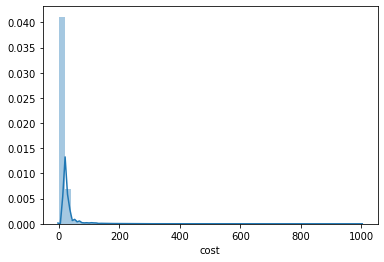

In [27]:
#Log transform regression target with right-skewed distrobution
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

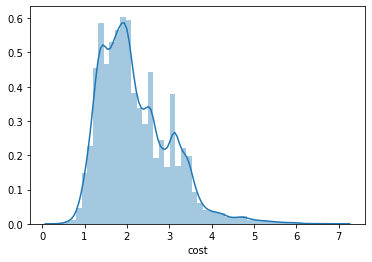

In [28]:
y_train_log = np.log1p(y_train)
sns.distplot(y_train_log);

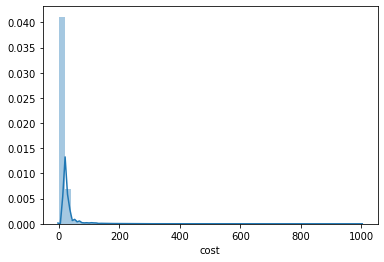

In [29]:
y_train_log_exp = np.expm1(y_train_log)
sns.distplot(y_train_log_exp);

In [30]:
all(np.isclose(y_train_log_exp, y_train))

True

In [31]:
#Refit MOdel with log-transformed data
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_val)
y_pred = np.expm1(y_pred_log)
rmsle(y_val, y_pred)

0.622925465880199

In [32]:
#RMSLE with original targets = RMSE with log-transformed targets
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

y_val_log = np.log1p(y_val)
rmse(y_val_log, y_pred_log)

0.622925465880199

In [33]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [34]:
train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983
10,TA-00004,S-0066,2013-07-07,0,0,Yes,5,6.668596
11,TA-00004,S-0066,2013-07-07,0,0,Yes,10,4.754539
12,TA-00004,S-0066,2013-07-07,0,0,Yes,25,3.608331


In [35]:
def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns='tube_assembly_id')
    
    return X

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

features = train_wrangled.columns.drop(target)
print('Features:', features.tolist())

Features: ['supplier', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'quote_date_year', 'quote_date_month']


In [36]:
X_train = train_wrangled[features]
X_val = val_wrangled[features]

import category_encoders as ce
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
rmse(y_val_log, y_pred_log)

0.3950176959701

In [37]:
y_pred = np.expm1(y_pred_log)
rmsle(y_val, y_pred)

0.3950176959701

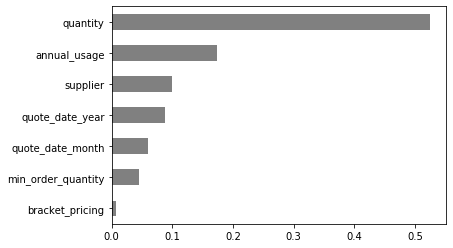

In [38]:
#feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

importances.sort_values().plot.barh(color='grey');

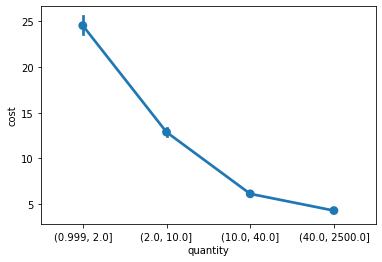

In [39]:
quantity_quartiles = pd.qcut(train_wrangled['quantity'], q=4)
sns.pointplot(x=quantity_quartiles, y=train_wrangled['cost']);

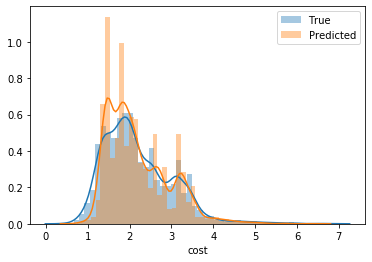

In [40]:
import matplotlib.pyplot as plt
sns.distplot(y_val_log, label='True')
sns.distplot(y_pred_log, label='Predicted')
plt.legend();

In [41]:
#feature engineering with relational data
for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    shared_columns = set(df.columns) & set(train.columns)
    if shared_columns:
        print(path, df.shape)
        print(df.columns.tolist(), '\n')

competition_data\bill_of_materials.csv (21198, 17)
['tube_assembly_id', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8'] 

competition_data\specs.csv (21198, 11)
['tube_assembly_id', 'spec1', 'spec2', 'spec3', 'spec4', 'spec5', 'spec6', 'spec7', 'spec8', 'spec9', 'spec10'] 

competition_data\test_set.csv (30235, 8)
['id', 'tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity'] 

competition_data\train_set.csv (30213, 8)
['tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'cost'] 

competition_data\tube.csv (21198, 16)
['tube_assembly_id', 'material_id', 'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end

In [42]:
tube = pd.read_csv('competition_data/tube.csv')

In [43]:
tube.describe()

,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other
count,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000
mean,23.687764,1.578402,100.312844,3.748137,49.350767,0.044485,0.006746,0.022644
std,25.396277,0.745749,70.542771,2.265405,196.468480,0.260737,0.100015,0.199676
min,3.180000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.520000,0.890000,48.000000,2.000000,19.050000,0.000000,0.000000,0.000000
50%,15.880000,1.650000,86.000000,3.000000,38.100000,0.000000,0.000000,0.000000
75%,25.400000,1.650000,135.000000,5.000000,50.800000,0.000000,0.000000,0.000000
max,203.200000,7.900000,1333.000000,17.000000,9999.000000,5.000000,5.000000,8.000000


In [44]:
tube.describe(exclude='number')

,tube_assembly_id,material_id,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x
count,21198,20919,21198,21198,21198,21198,21198,21198
unique,21198,19,2,2,2,2,25,27
top,TA-10277,SP-0029,N,N,N,N,EF-003,EF-003
freq,1,11488,20118,18015,20377,18493,11388,10863


In [45]:
def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # Merge tube data
    tube = pd.read_csv('competition_data/tube.csv')
    X = X.merge(tube, how='left')
    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns='tube_assembly_id')
    
    return X


train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [46]:
train_wrangled.head(10)

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,quote_date_year,quote_date_month,material_id,diameter,...,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,S-0066,0,0,Yes,1,21.972702,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
1,S-0066,0,0,Yes,2,12.407983,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,S-0066,0,0,Yes,5,6.668596,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,S-0066,0,0,Yes,10,4.754539,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,S-0066,0,0,Yes,25,3.608331,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
5,S-0066,0,0,Yes,50,3.291176,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
6,S-0066,0,0,Yes,100,3.149291,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
7,S-0066,0,0,Yes,250,3.065829,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
8,S-0066,0,0,Yes,1,28.374220,2013,9,SP-0029,19.05,...,50.80,N,N,N,N,EF-003,EF-003,0,0,0
9,S-0066,0,0,Yes,2,16.514303,2013,9,SP-0029,19.05,...,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [47]:
train_wrangled.shape, val_wrangled.shape

((22628, 23), (7585, 23))

In [48]:
train_wrangled.head(10)

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,quote_date_year,quote_date_month,material_id,diameter,...,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,S-0066,0,0,Yes,1,21.972702,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
1,S-0066,0,0,Yes,2,12.407983,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,S-0066,0,0,Yes,5,6.668596,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,S-0066,0,0,Yes,10,4.754539,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,S-0066,0,0,Yes,25,3.608331,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
5,S-0066,0,0,Yes,50,3.291176,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
6,S-0066,0,0,Yes,100,3.149291,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
7,S-0066,0,0,Yes,250,3.065829,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
8,S-0066,0,0,Yes,1,28.374220,2013,9,SP-0029,19.05,...,50.80,N,N,N,N,EF-003,EF-003,0,0,0
9,S-0066,0,0,Yes,2,16.514303,2013,9,SP-0029,19.05,...,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [49]:
X_train = train_wrangled.drop(columns=target)
X_val = val_wrangled.drop(columns=target)

In [50]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train_log)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['supplier', 'bracket_pricing',
                                      'material_id', 'end_a_1x', 'end_a_2x',
                                      'end_x_1x', 'end_x_2x', 'end_a',
                                      'end_x'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'supplier',
                                          'data_type': dtype('O'),
                                          'mapping': S-0066     1
S-0026     2
S-0030     3
S-0013     4
S-0062     5
S-0014     6
S-0072     7
S-0...
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
               

In [51]:
y_pred_log = pipeline.predict(X_val)
rmse(y_val_log, y_pred_log)

0.3067473950776893

In [54]:
test_wrangled = wrangle(test)
X_test = test_wrangled.drop(columns='id')
all(X_test.columns == X_train.columns)

True

In [55]:
X_test.fillna(X_train.mean(), inplace=True)

In [56]:
y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['cost'] = y_pred
submission.to_csv('submission-01.csv', index=False)

In [ ]:
#continuing with new methods on same data

In [57]:
#feature engineering with relational data
SOURCE = 'competition_data/'

In [58]:
materials = pd.read_csv(SOURCE + 'bill_of_materials.csv')
materials.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
materials.describe(exclude='number')

,tube_assembly_id,component_id_1,component_id_2,component_id_3,component_id_4,component_id_5,component_id_6,component_id_7,component_id_8
count,21198,19149,14786,4791,607,92,26,7,1
unique,21198,1079,834,509,204,62,19,4,1
top,TA-10277,C-1621,C-1628,C-1641,C-1660,C-0872,C-0923,C-1019,C-1981
freq,1,2043,1959,421,62,10,3,3,1


In [60]:
materials.isnull().sum()/len(materials)

tube_assembly_id    0.000000
component_id_1      0.096660
quantity_1          0.096660
component_id_2      0.302481
quantity_2          0.302481
component_id_3      0.773988
quantity_3          0.773658
component_id_4      0.971365
quantity_4          0.971318
component_id_5      0.995660
quantity_5          0.995660
component_id_6      0.998773
quantity_6          0.998773
component_id_7      0.999670
quantity_7          0.999670
component_id_8      0.999953
quantity_8          0.999953
dtype: float64

In [61]:
components = pd.read_csv(SOURCE + 'components.csv')
components.describe()

,component_id,name,component_type_id
count,2048,2047,2048
unique,2048,297,29
top,C-1457,FLANGE,OTHER
freq,1,350,1006


In [62]:
components.head()

,component_id,name,component_type_id
0,9999,OTHER,OTHER
1,C-0001,SLEEVE,CP-024
2,C-0002,SLEEVE,CP-024
3,C-0003,SLEEVE-FLARED,CP-024
4,C-0004,NUT,CP-026


In [64]:
components['name'].nunique()

297

In [66]:
glob(SOURCE + '*.csv')

['competition_data\\bill_of_materials.csv',
 'competition_data\\components.csv',
 'competition_data\\comp_adaptor.csv',
 'competition_data\\comp_boss.csv',
 'competition_data\\comp_elbow.csv',
 'competition_data\\comp_float.csv',
 'competition_data\\comp_hfl.csv',
 'competition_data\\comp_nut.csv',
 'competition_data\\comp_other.csv',
 'competition_data\\comp_sleeve.csv',
 'competition_data\\comp_straight.csv',
 'competition_data\\comp_tee.csv',
 'competition_data\\comp_threaded.csv',
 'competition_data\\specs.csv',
 'competition_data\\test_set.csv',
 'competition_data\\train_set.csv',
 'competition_data\\tube.csv',
 'competition_data\\tube_end_form.csv',
 'competition_data\\type_component.csv',
 'competition_data\\type_connection.csv',
 'competition_data\\type_end_form.csv']

In [70]:
from glob import glob

data = {}
for path in glob(SOURCE + '*.csv'):
    df = pd.read_csv(path)
    filename = path.split('/')[-1]#look into
    name = filename.split('.')[0]
    data[name] = df

In [71]:
data.keys()

dict_keys(['competition_data\\bill_of_materials', 'competition_data\\components', 'competition_data\\comp_adaptor', 'competition_data\\comp_boss', 'competition_data\\comp_elbow', 'competition_data\\comp_float', 'competition_data\\comp_hfl', 'competition_data\\comp_nut', 'competition_data\\comp_other', 'competition_data\\comp_sleeve', 'competition_data\\comp_straight', 'competition_data\\comp_tee', 'competition_data\\comp_threaded', 'competition_data\\specs', 'competition_data\\test_set', 'competition_data\\train_set', 'competition_data\\tube', 'competition_data\\tube_end_form', 'competition_data\\type_component', 'competition_data\\type_connection', 'competition_data\\type_end_form'])

In [75]:
data['competition_data\\comp_sleeve'].head()

,component_id,component_type_id,connection_type_id,length,intended_nut_thread,intended_nut_pitch,unique_feature,plating,orientation,weight
0,C-0001,CP-024,B-001,17.3,1.062,12,No,No,No,0.013
1,C-0002,CP-024,B-001,11.2,0.500,20,No,No,No,0.005
2,C-0003,CP-024,B-001,19.3,1.187,12,No,No,No,0.014
3,C-0048,CP-024,B-002,9.5,0.562,18,No,No,No,0.006
4,C-0049,CP-024,B-002,9.5,0.812,16,No,No,No,0.012


In [87]:
#use cgboost for gradieant boosting
!pip install xgboost
from xgboost import XGBRegressor

In [89]:
#pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators = 1000, n_jpb=-1)
)

In [90]:
#fit
pipeline.fit(X_train,y_train_log)

C:\Users\tako\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:15:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['supplier', 'bracket_pricing',
                                      'material_id', 'end_a_1x', 'end_a_2x',
                                      'end_x_1x', 'end_x_2x', 'end_a',
                                      'end_x'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'supplier',
                                          'data_type': dtype('O'),
                                          'mapping': S-0066     1
S-0026     2
S-0030     3
S-0013     4
S-0062     5
S-0014     6
S-0072     7
S-0...
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, m

In [91]:
#validate
y_pred_log = pipeline.predict(X_val)
print('Validation error', rmse(y_val_log, y_pred_log))

Validation error 0.29397781038226706


In [93]:
def generate_submission(estimator, X_test, filename):
    y_pred_log = estimator.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Convert from log-dollars to dollars
    submission = pd.read_csv(SOURCE + '../sample_submission.csv')
    submission['cost'] = y_pred
    submission.to_csv(filename, index=False)
    
generate_submission(pipeline, X_test, 'submission-02.csv')

In [95]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

In [96]:
eval_set = [
    (X_train_encoded, y_train_log),
    (X_val_encoded, y_val_log)
]

In [97]:
model = XGBRegressor(n_estimators=1000, n_job=-1)

model.fit(X_train_encoded, 
          y_train_log, 
          eval_set=eval_set,
          eval_metric='rmse',
          early_stopping_rounds=10
         )

[22:22:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.71924	validation_1-rmse:1.70846
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.56516	validation_1-rmse:1.55498
[2]	validation_0-rmse:1.42805	validation_1-rmse:1.41868
[3]	validation_0-rmse:1.3038	validation_1-rmse:1.29472


C:\Users\tako\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[4]	validation_0-rmse:1.19233	validation_1-rmse:1.18372
[5]	validation_0-rmse:1.09432	validation_1-rmse:1.08627
[6]	validation_0-rmse:1.00669	validation_1-rmse:0.999137
[7]	validation_0-rmse:0.930868	validation_1-rmse:0.923643
[8]	validation_0-rmse:0.862939	validation_1-rmse:0.856299
[9]	validation_0-rmse:0.803185	validation_1-rmse:0.796446
[10]	validation_0-rmse:0.751263	validation_1-rmse:0.745281
[11]	validation_0-rmse:0.706111	validation_1-rmse:0.70065
[12]	validation_0-rmse:0.664845	validation_1-rmse:0.659469
[13]	validation_0-rmse:0.630449	validation_1-rmse:0.625833
[14]	validation_0-rmse:0.600932	validation_1-rmse:0.596763
[15]	validation_0-rmse:0.573589	validation_1-rmse:0.569538
[16]	validation_0-rmse:0.551587	validation_1-rmse:0.546927
[17]	validation_0-rmse:0.532088	validation_1-rmse:0.528199
[18]	validation_0-rmse:0.515104	validation_1-rmse:0.511635
[19]	validation_0-rmse:0.498265	validation_1-rmse:0.494894
[20]	validation_0-rmse:0.485998	validation_1-rmse:0.482858
[21]	vali

[143]	validation_0-rmse:0.313193	validation_1-rmse:0.334091
[144]	validation_0-rmse:0.312907	validation_1-rmse:0.333874
[145]	validation_0-rmse:0.312742	validation_1-rmse:0.333759
[146]	validation_0-rmse:0.312657	validation_1-rmse:0.333784
[147]	validation_0-rmse:0.312444	validation_1-rmse:0.333261
[148]	validation_0-rmse:0.311791	validation_1-rmse:0.332722
[149]	validation_0-rmse:0.311364	validation_1-rmse:0.332361
[150]	validation_0-rmse:0.310746	validation_1-rmse:0.331729
[151]	validation_0-rmse:0.310544	validation_1-rmse:0.331555
[152]	validation_0-rmse:0.310338	validation_1-rmse:0.331359
[153]	validation_0-rmse:0.310086	validation_1-rmse:0.331281
[154]	validation_0-rmse:0.309884	validation_1-rmse:0.33108
[155]	validation_0-rmse:0.309482	validation_1-rmse:0.330715
[156]	validation_0-rmse:0.309262	validation_1-rmse:0.330702
[157]	validation_0-rmse:0.308872	validation_1-rmse:0.330583
[158]	validation_0-rmse:0.308286	validation_1-rmse:0.330333
[159]	validation_0-rmse:0.308084	validati

[280]	validation_0-rmse:0.285589	validation_1-rmse:0.316279
[281]	validation_0-rmse:0.285339	validation_1-rmse:0.316138
[282]	validation_0-rmse:0.285018	validation_1-rmse:0.315938
[283]	validation_0-rmse:0.284852	validation_1-rmse:0.315866
[284]	validation_0-rmse:0.284612	validation_1-rmse:0.315405
[285]	validation_0-rmse:0.284372	validation_1-rmse:0.315125
[286]	validation_0-rmse:0.284092	validation_1-rmse:0.3149
[287]	validation_0-rmse:0.28404	validation_1-rmse:0.314884
[288]	validation_0-rmse:0.283933	validation_1-rmse:0.314845
[289]	validation_0-rmse:0.283639	validation_1-rmse:0.314741
[290]	validation_0-rmse:0.283588	validation_1-rmse:0.314754
[291]	validation_0-rmse:0.283531	validation_1-rmse:0.314771
[292]	validation_0-rmse:0.283474	validation_1-rmse:0.314713
[293]	validation_0-rmse:0.283305	validation_1-rmse:0.314578
[294]	validation_0-rmse:0.283153	validation_1-rmse:0.31448
[295]	validation_0-rmse:0.282972	validation_1-rmse:0.314513
[296]	validation_0-rmse:0.282791	validation_

[418]	validation_0-rmse:0.26743	validation_1-rmse:0.305577
[419]	validation_0-rmse:0.267393	validation_1-rmse:0.305562
[420]	validation_0-rmse:0.267342	validation_1-rmse:0.305538
[421]	validation_0-rmse:0.267299	validation_1-rmse:0.305568
[422]	validation_0-rmse:0.26718	validation_1-rmse:0.305632
[423]	validation_0-rmse:0.267044	validation_1-rmse:0.305511
[424]	validation_0-rmse:0.267001	validation_1-rmse:0.305544
[425]	validation_0-rmse:0.266882	validation_1-rmse:0.305531
[426]	validation_0-rmse:0.266686	validation_1-rmse:0.305378
[427]	validation_0-rmse:0.266637	validation_1-rmse:0.305387
[428]	validation_0-rmse:0.266544	validation_1-rmse:0.305328
[429]	validation_0-rmse:0.266425	validation_1-rmse:0.305276
[430]	validation_0-rmse:0.266311	validation_1-rmse:0.305181
[431]	validation_0-rmse:0.266277	validation_1-rmse:0.305188
[432]	validation_0-rmse:0.266194	validation_1-rmse:0.305169
[433]	validation_0-rmse:0.266151	validation_1-rmse:0.305206
[434]	validation_0-rmse:0.26602	validation

[556]	validation_0-rmse:0.252857	validation_1-rmse:0.300843
[557]	validation_0-rmse:0.252763	validation_1-rmse:0.300786
[558]	validation_0-rmse:0.252718	validation_1-rmse:0.300811
[559]	validation_0-rmse:0.252671	validation_1-rmse:0.300813
[560]	validation_0-rmse:0.252525	validation_1-rmse:0.300632
[561]	validation_0-rmse:0.252382	validation_1-rmse:0.300619
[562]	validation_0-rmse:0.252324	validation_1-rmse:0.300642
[563]	validation_0-rmse:0.252281	validation_1-rmse:0.30063
[564]	validation_0-rmse:0.252207	validation_1-rmse:0.300604
[565]	validation_0-rmse:0.252068	validation_1-rmse:0.300457
[566]	validation_0-rmse:0.251863	validation_1-rmse:0.300435
[567]	validation_0-rmse:0.251803	validation_1-rmse:0.300415
[568]	validation_0-rmse:0.251718	validation_1-rmse:0.300351
[569]	validation_0-rmse:0.251518	validation_1-rmse:0.300162
[570]	validation_0-rmse:0.251503	validation_1-rmse:0.300151
[571]	validation_0-rmse:0.251286	validation_1-rmse:0.299973
[572]	validation_0-rmse:0.251162	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_job=-1, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

(0.2, 0.4)

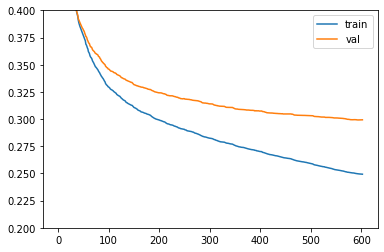

In [98]:
results = model.evals_result()

train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']

epochs = range(0, len(train_rmse))

plt.plot(epochs, train_rmse, label='train')
plt.plot(epochs, val_rmse, label='val')
plt.legend();
plt.ylim(0.2, 0.4)

In [108]:
!pip install catboost
from catboost import CatBoostRegressor

# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    CatBoostRegressor(learning_rate=0.3)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

0:	learn: 1.7131692	total: 38.4ms	remaining: 38.4s
1:	learn: 1.2580153	total: 73.8ms	remaining: 36.8s
2:	learn: 0.9542406	total: 109ms	remaining: 36.4s
3:	learn: 0.7578381	total: 144ms	remaining: 35.8s
4:	learn: 0.6133605	total: 179ms	remaining: 35.5s
5:	learn: 0.5294020	total: 217ms	remaining: 35.9s
6:	learn: 0.4725538	total: 252ms	remaining: 35.8s
7:	learn: 0.4408233	total: 284ms	remaining: 35.2s
8:	learn: 0.4156062	total: 318ms	remaining: 35.1s
9:	learn: 0.4024415	total: 354ms	remaining: 35.1s
10:	learn: 0.3926765	total: 389ms	remaining: 35s
11:	learn: 0.3859206	total: 424ms	remaining: 34.9s
12:	learn: 0.3755742	total: 459ms	remaining: 34.8s
13:	learn: 0.3733386	total: 494ms	remaining: 34.8s
14:	learn: 0.3654079	total: 527ms	remaining: 34.6s
15:	learn: 0.3623774	total: 558ms	remaining: 34.3s
16:	learn: 0.3560303	total: 590ms	remaining: 34.1s
17:	learn: 0.3537026	total: 626ms	remaining: 34.2s
18:	learn: 0.3502014	total: 658ms	remaining: 34s
19:	learn: 0.3464837	total: 689ms	remaining

134:	learn: 0.2643597	total: 4.57s	remaining: 29.3s
135:	learn: 0.2638254	total: 4.61s	remaining: 29.3s
136:	learn: 0.2638137	total: 4.64s	remaining: 29.2s
137:	learn: 0.2638043	total: 4.67s	remaining: 29.2s
138:	learn: 0.2634029	total: 4.7s	remaining: 29.1s
139:	learn: 0.2634025	total: 4.72s	remaining: 29s
140:	learn: 0.2616082	total: 4.76s	remaining: 29s
141:	learn: 0.2616012	total: 4.79s	remaining: 28.9s
142:	learn: 0.2615374	total: 4.82s	remaining: 28.9s
143:	learn: 0.2613872	total: 4.86s	remaining: 28.9s
144:	learn: 0.2613852	total: 4.89s	remaining: 28.8s
145:	learn: 0.2613727	total: 4.93s	remaining: 28.8s
146:	learn: 0.2610876	total: 4.96s	remaining: 28.8s
147:	learn: 0.2607943	total: 5s	remaining: 28.8s
148:	learn: 0.2607821	total: 5.04s	remaining: 28.8s
149:	learn: 0.2607450	total: 5.07s	remaining: 28.8s
150:	learn: 0.2607428	total: 5.1s	remaining: 28.7s
151:	learn: 0.2607417	total: 5.13s	remaining: 28.6s
152:	learn: 0.2607412	total: 5.17s	remaining: 28.6s
153:	learn: 0.2607403

298:	learn: 0.2437444	total: 9.79s	remaining: 23s
299:	learn: 0.2437225	total: 9.82s	remaining: 22.9s
300:	learn: 0.2436474	total: 9.85s	remaining: 22.9s
301:	learn: 0.2434694	total: 9.88s	remaining: 22.8s
302:	learn: 0.2433929	total: 9.91s	remaining: 22.8s
303:	learn: 0.2432369	total: 9.95s	remaining: 22.8s
304:	learn: 0.2431587	total: 9.98s	remaining: 22.7s
305:	learn: 0.2431570	total: 10s	remaining: 22.7s
306:	learn: 0.2431530	total: 10s	remaining: 22.7s
307:	learn: 0.2431334	total: 10.1s	remaining: 22.6s
308:	learn: 0.2431329	total: 10.1s	remaining: 22.6s
309:	learn: 0.2431326	total: 10.1s	remaining: 22.6s
310:	learn: 0.2426428	total: 10.2s	remaining: 22.5s
311:	learn: 0.2426350	total: 10.2s	remaining: 22.5s
312:	learn: 0.2426330	total: 10.2s	remaining: 22.5s
313:	learn: 0.2426216	total: 10.3s	remaining: 22.4s
314:	learn: 0.2426214	total: 10.3s	remaining: 22.4s
315:	learn: 0.2426213	total: 10.3s	remaining: 22.3s
316:	learn: 0.2425216	total: 10.4s	remaining: 22.3s
317:	learn: 0.2415

462:	learn: 0.2348838	total: 15.6s	remaining: 18.1s
463:	learn: 0.2348836	total: 15.6s	remaining: 18s
464:	learn: 0.2348834	total: 15.6s	remaining: 18s
465:	learn: 0.2348805	total: 15.7s	remaining: 18s
466:	learn: 0.2348802	total: 15.7s	remaining: 17.9s
467:	learn: 0.2348800	total: 15.7s	remaining: 17.9s
468:	learn: 0.2348755	total: 15.8s	remaining: 17.9s
469:	learn: 0.2348660	total: 15.8s	remaining: 17.8s
470:	learn: 0.2348657	total: 15.8s	remaining: 17.8s
471:	learn: 0.2348650	total: 15.9s	remaining: 17.7s
472:	learn: 0.2347762	total: 15.9s	remaining: 17.7s
473:	learn: 0.2347757	total: 15.9s	remaining: 17.7s
474:	learn: 0.2347752	total: 16s	remaining: 17.6s
475:	learn: 0.2345445	total: 16s	remaining: 17.6s
476:	learn: 0.2345444	total: 16s	remaining: 17.6s
477:	learn: 0.2345432	total: 16.1s	remaining: 17.5s
478:	learn: 0.2345431	total: 16.1s	remaining: 17.5s
479:	learn: 0.2345430	total: 16.1s	remaining: 17.5s
480:	learn: 0.2345423	total: 16.2s	remaining: 17.4s
481:	learn: 0.2345152	to

626:	learn: 0.2276555	total: 20.8s	remaining: 12.4s
627:	learn: 0.2276551	total: 20.8s	remaining: 12.3s
628:	learn: 0.2276537	total: 20.8s	remaining: 12.3s
629:	learn: 0.2276533	total: 20.9s	remaining: 12.3s
630:	learn: 0.2276523	total: 20.9s	remaining: 12.2s
631:	learn: 0.2275588	total: 20.9s	remaining: 12.2s
632:	learn: 0.2275588	total: 21s	remaining: 12.2s
633:	learn: 0.2275568	total: 21s	remaining: 12.1s
634:	learn: 0.2275567	total: 21s	remaining: 12.1s
635:	learn: 0.2275374	total: 21.1s	remaining: 12.1s
636:	learn: 0.2275206	total: 21.1s	remaining: 12s
637:	learn: 0.2274787	total: 21.1s	remaining: 12s
638:	learn: 0.2274782	total: 21.2s	remaining: 11.9s
639:	learn: 0.2274772	total: 21.2s	remaining: 11.9s
640:	learn: 0.2274762	total: 21.2s	remaining: 11.9s
641:	learn: 0.2273917	total: 21.3s	remaining: 11.9s
642:	learn: 0.2273916	total: 21.3s	remaining: 11.8s
643:	learn: 0.2273909	total: 21.3s	remaining: 11.8s
644:	learn: 0.2273907	total: 21.3s	remaining: 11.7s
645:	learn: 0.2273905	

788:	learn: 0.2231882	total: 25.9s	remaining: 6.93s
789:	learn: 0.2231881	total: 25.9s	remaining: 6.89s
790:	learn: 0.2231880	total: 26s	remaining: 6.86s
791:	learn: 0.2231874	total: 26s	remaining: 6.83s
792:	learn: 0.2231842	total: 26s	remaining: 6.79s
793:	learn: 0.2231476	total: 26.1s	remaining: 6.76s
794:	learn: 0.2231472	total: 26.1s	remaining: 6.73s
795:	learn: 0.2231470	total: 26.1s	remaining: 6.7s
796:	learn: 0.2231469	total: 26.2s	remaining: 6.66s
797:	learn: 0.2231462	total: 26.2s	remaining: 6.63s
798:	learn: 0.2231461	total: 26.2s	remaining: 6.6s
799:	learn: 0.2231450	total: 26.3s	remaining: 6.56s
800:	learn: 0.2231436	total: 26.3s	remaining: 6.53s
801:	learn: 0.2231435	total: 26.3s	remaining: 6.5s
802:	learn: 0.2231431	total: 26.4s	remaining: 6.47s
803:	learn: 0.2231420	total: 26.4s	remaining: 6.43s
804:	learn: 0.2231419	total: 26.4s	remaining: 6.4s
805:	learn: 0.2231417	total: 26.5s	remaining: 6.37s
806:	learn: 0.2231417	total: 26.5s	remaining: 6.33s
807:	learn: 0.2231417	

948:	learn: 0.2214318	total: 31.1s	remaining: 1.67s
949:	learn: 0.2214284	total: 31.1s	remaining: 1.64s
950:	learn: 0.2208890	total: 31.1s	remaining: 1.6s
951:	learn: 0.2208857	total: 31.2s	remaining: 1.57s
952:	learn: 0.2208840	total: 31.2s	remaining: 1.54s
953:	learn: 0.2208834	total: 31.2s	remaining: 1.5s
954:	learn: 0.2208685	total: 31.2s	remaining: 1.47s
955:	learn: 0.2208682	total: 31.3s	remaining: 1.44s
956:	learn: 0.2208681	total: 31.3s	remaining: 1.41s
957:	learn: 0.2208631	total: 31.3s	remaining: 1.37s
958:	learn: 0.2208623	total: 31.4s	remaining: 1.34s
959:	learn: 0.2208622	total: 31.4s	remaining: 1.31s
960:	learn: 0.2208619	total: 31.4s	remaining: 1.28s
961:	learn: 0.2208618	total: 31.5s	remaining: 1.24s
962:	learn: 0.2208615	total: 31.5s	remaining: 1.21s
963:	learn: 0.2208604	total: 31.5s	remaining: 1.18s
964:	learn: 0.2208604	total: 31.6s	remaining: 1.15s
965:	learn: 0.2208263	total: 31.6s	remaining: 1.11s
966:	learn: 0.2208260	total: 31.6s	remaining: 1.08s
967:	learn: 0.

In [113]:
!pip install lightgbm
import lightgbm as lgbm

In [120]:
# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    lgbm.sklearn.LGBMRegressor(learning_rate=0.2)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

Validation Error 0.2871460494839737


In [115]:
def generate_submission(estimator, X_test, filename):
    y_pred_log = estimator.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Convert from log-dollars to dollars
    submission = pd.read_csv(SOURCE + '../sample_submission.csv')
    submission['cost'] = y_pred
    submission.to_csv(filename, index=False)
    
generate_submission(pipeline, X_test, 'submission-03.csv')